In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd

In [29]:
path_file = "dataset/diabetes.csv"

In [30]:
label= "Outcome"

In [31]:


def create_dataset(path_file):
    df = pd.read_csv(path_file)
    return df

def create_dataframe_features_selected(df:pd.DataFrame,columns:list):
    return df[columns]

def preprocessing(df, num_features=4, num_tuples=100):
    df=df.drop(columns= ["Age"])
    df=KBestFeaturesSelected(df,num_features)
    df=campionamento(df,num_class_0=num_tuples,num_class_1=num_tuples)
    return df

def campionamento(df, num_class_0=100, num_class_1=100):
    df_filtrato_0 = df[df[label]==0]
    df_campione_0 = df_filtrato_0.sample(n=num_class_0, random_state=42)
    df_filtrato_1 = df[df[label]==1]
    df_campione_1 = df_filtrato_1.sample(n=num_class_1, random_state=42)
    return pd.concat([df_campione_0, df_campione_1], axis=0, ignore_index=True)

def KBestFeaturesSelected(df,k=4):
    X= df.drop(columns=[label])
    y=df[label]
    selector= SelectKBest(f_classif, k=k)
    selector.fit_transform(X,y)
    listKbestColumns= list(X.columns[selector.get_support()])
    return df[listKbestColumns+[label]]


In [32]:
df=create_dataset(path_file)
df=preprocessing(df, num_features=5, num_tuples=100)
print(df.describe(include='all'))
#df=preprocessing(df)

       Pregnancies     Glucose     Insulin         BMI  \
count   200.000000  200.000000  200.000000  200.000000   
mean      3.880000  123.765000   83.475000   32.400000   
std       3.428465   31.464262  113.209591    7.343174   
min       0.000000    0.000000    0.000000    0.000000   
25%       1.000000  102.000000    0.000000   27.875000   
50%       3.000000  119.500000   49.500000   32.250000   
75%       6.000000  146.000000  130.000000   36.325000   
max      13.000000  198.000000  600.000000   55.000000   

       DiabetesPedigreeFunction     Outcome  
count                200.000000  200.000000  
mean                   0.478920    0.500000  
std                    0.325086    0.501255  
min                    0.096000    0.000000  
25%                    0.258000    0.000000  
50%                    0.377000    0.500000  
75%                    0.631750    1.000000  
max                    2.288000    1.000000  


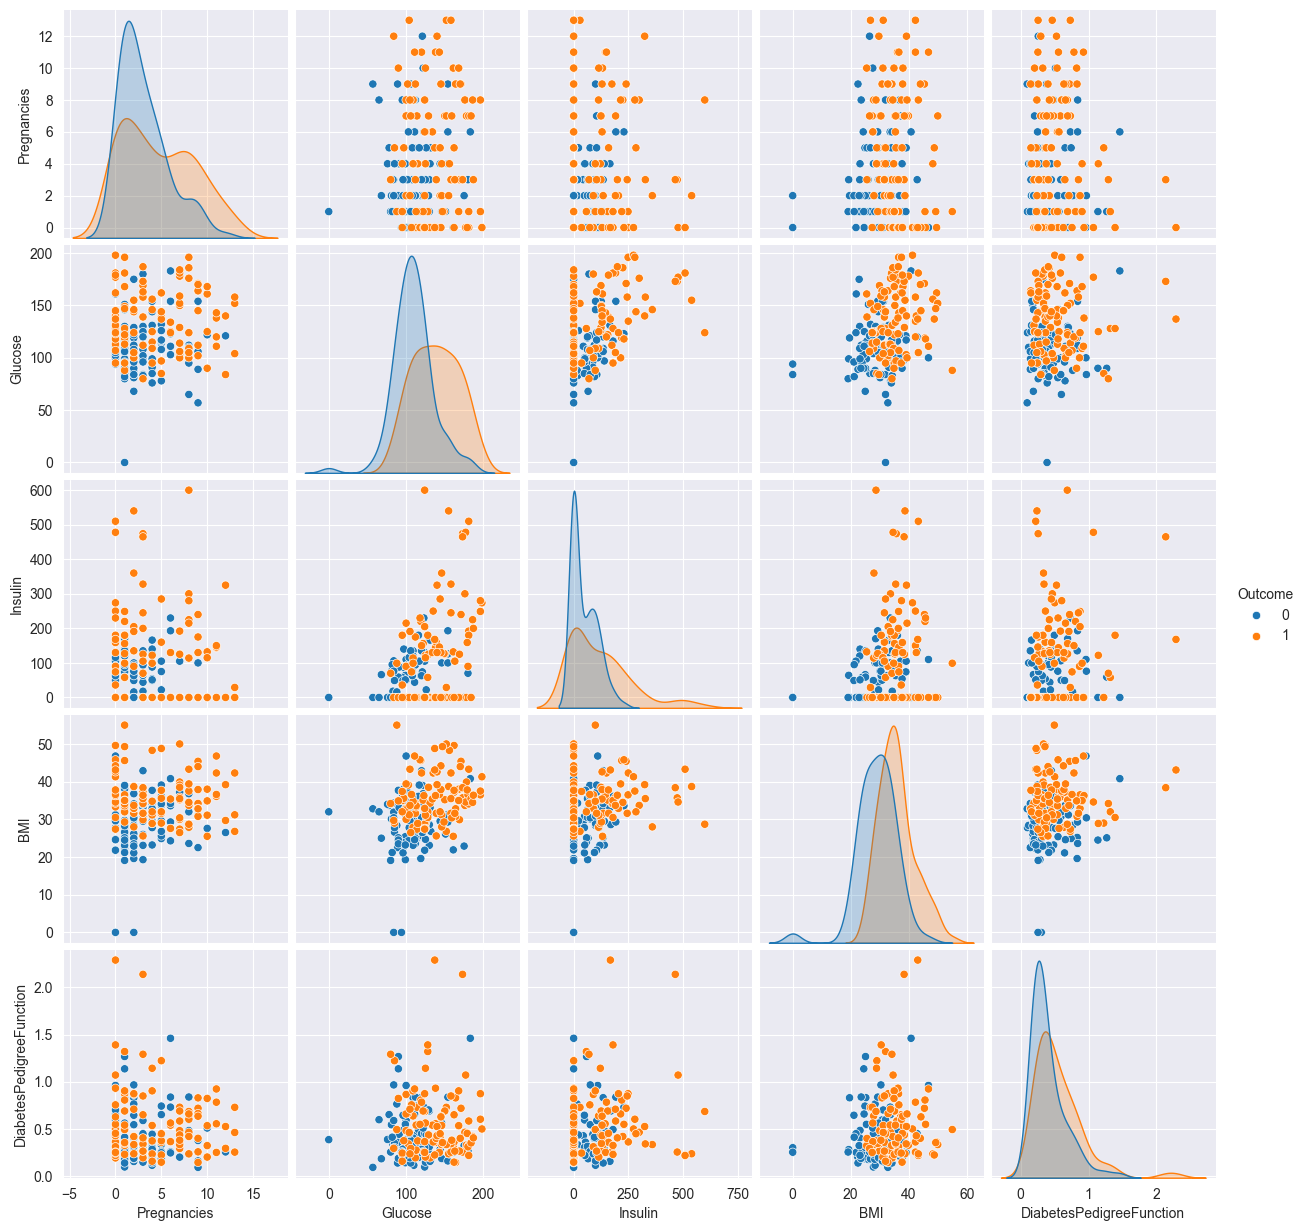

In [33]:
sns.pairplot(df, hue=label, palette="tab10")

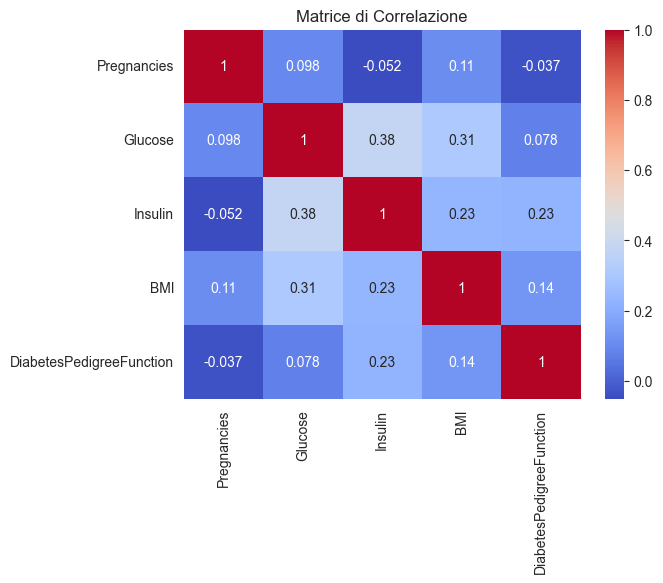

In [34]:
df_corr=df.drop(columns=[label])
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm')
plt.title("Matrice di Correlazione")
plt.show()

In [35]:
n_features=len(list(df.columns))-1

In [36]:
df.to_csv(f'final_diabetes_dataset_{n_features}.csv', index=False)